<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MN_MJ_20221_Clase05u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación Clase

**Nombres:** 

Esteban Velilla H.

Jaime A. Valencia V.


**Email:**

esteban.velilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Métodos numéricos 2022-1

**Fecha:**
Jueves 2022-juno-07

# Descripción

**Objetivos**

Presentación introducción de problemas de máximos y mínimos (Optimización). Capitulo 13 de Chapra y Canale. Optimizacion en una dimension.


**Desarrollo**



1.   Golden Search
2.   Parabolic Interpolation
3.   Newton - optimization
4.   Metodo de la Derivada




# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [ ]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.4.1
Version sympy:  1.7.1


# Golden Search

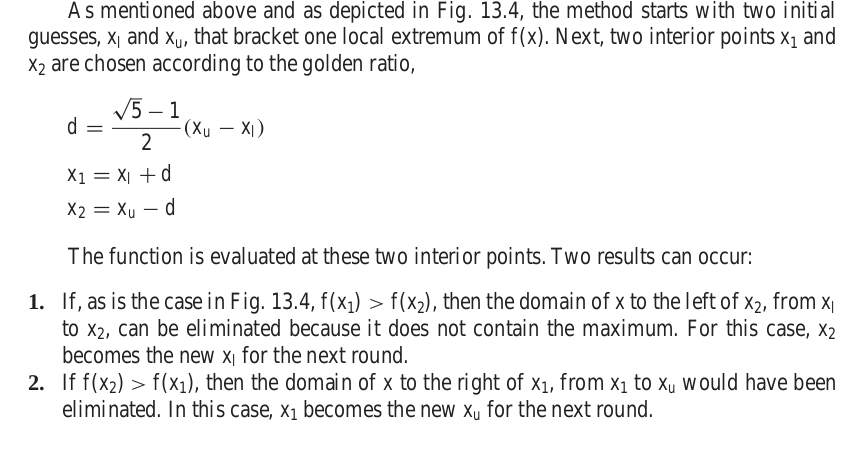

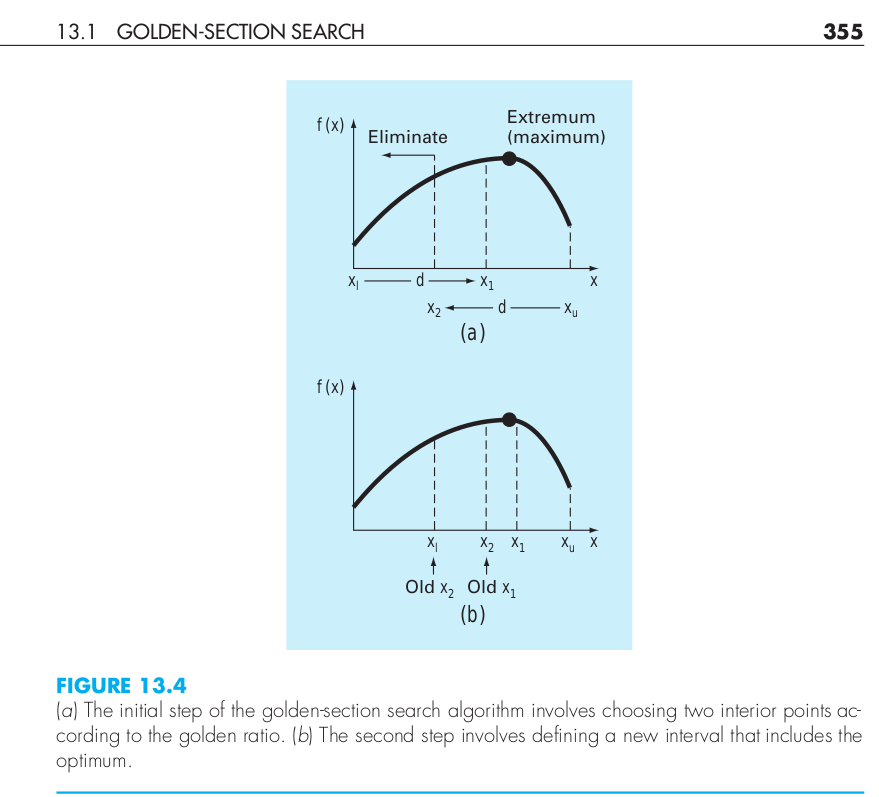

Golden Rate:  0.6180339887498949
Iteracion:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


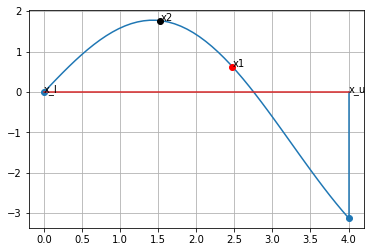

Iteracion:  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


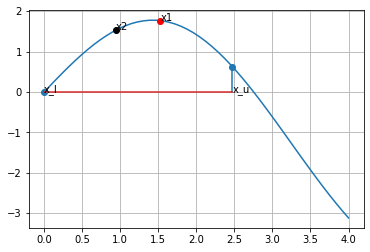

Iteracion:  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


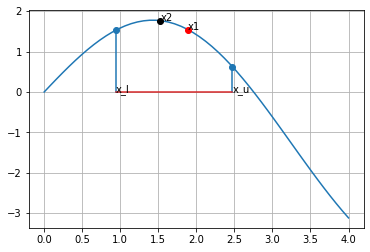

Iteracion:  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


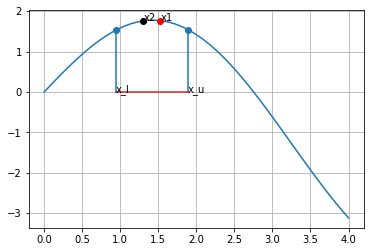

aproximacion:  1.3049516849970557 1.8885438199983178


In [ ]:
##Ejemplo 13.1 Chapra y Canale pag.356 ed.6
GR = (np.sqrt(5)-1)/2
print("Golden Rate: ", GR)

f_x = lambda x:2*np.sin(x)-((x**2)/10)

##Como procede el algoritmo
x_l = 0
x_u = 4

xr = np.linspace(x_l,x_u)
fxr = f_x(xr)

for k in range(4):
    print("Iteracion: ",k)
    fxl = f_x(x_l)
    fxu = f_x(x_u)
    d = GR*(x_u-x_l)
    x1 = x_l + d
    x2 = x_u - d
    f1 = f_x(x1)
    f2 = f_x(x2)

    plt.plot(xr,fxr,x1,f1,"ro",x2,f2,"ko")
    plt.text(x1,f1,"x1")
    plt.text(x2,f2,"x2")
    plt.stem([x_l,x_u],[fxl,fxu])
    plt.text(x_u,0,"x_u")
    plt.text(x_l,0,"x_l")
    plt.grid("on")
    plt.show()

    if f1>f2:
        x_l = x2
    else:
        x_u = x1
    
print("aproximacion: ",x_l,x_u)


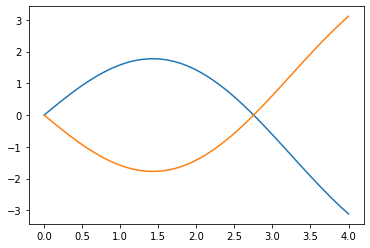

Golden:  1.427551770354865 1.4275517796423967
Brent:  1.4275517797083348 1.427551781310228
fminbound:  1.4275517992922275


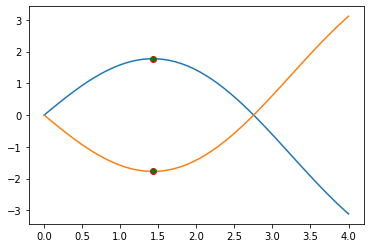

In [ ]:
####################Usando scipy
from scipy import optimize as OP

f1_x = lambda x: -1*f_x(x)

x_l = 0
x_u = 4

x = np.linspace(x_l,x_u)
y = f_x(x)
y1 = f1_x(x)
plt.plot(x,y,x,y1)
plt.show()

res = OP.golden(f1_x)
res1 = OP.golden(f1_x,brack=[x_l,x_u])
print("Golden: ",res,res1)

Bres = OP.brent(f1_x)
Bres1 = OP.brent(f1_x, brack=(x_l,x_u))
print("Brent: ",Bres,Bres1)

Fmb = OP.fminbound(f1_x, x_l, x_u)
print("fminbound: ",Fmb)

plt.plot(x,y,x,y1)
plt.plot(res,f_x(res),"ro")
plt.plot(res,f1_x(res),"ro")
plt.plot(res1,f_x(res1),"g*")
plt.plot(res1,f1_x(res1),"g*")


plt.show()


# **Parabolic Interpolation**

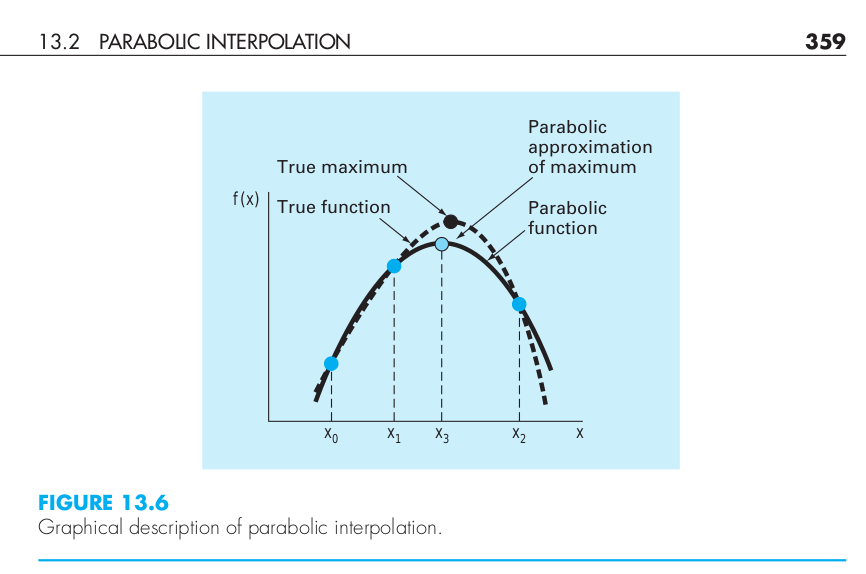

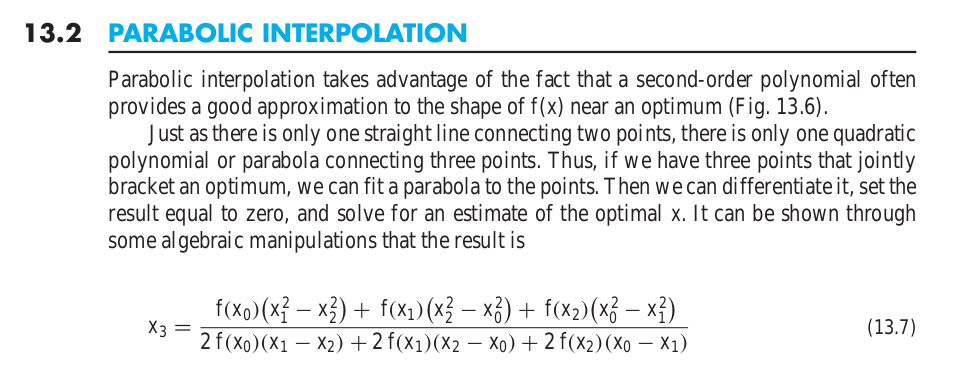

In [ ]:

##Ejemplo 13.2 Chapra y Canale pag.360 ed.6

f_x = lambda x:2*np.sin(x)-((x**2)/10)

x0 = 0
x1 = 1
x2 = 4
f0 = f_x(x0)
f1 = f_x(x1)
f2 = f_x(x2)
ss = " x0:{} f(x0):{} \n x1:{}  f(x1):{} \n x2:{}  f(x2):{}".format(x0,f0,x1,f1,x2,f2)
print(ss)
##Como procede el algoritmo
x3 = (f0*(x1**2 - x2**2) + f1*(x2**2 - x0**2) + f2*(x0**2 - x1**2))/(2*f0*(x1 - x2) + 2*f1*(x2 - x0) + 2*f2*(x0 - x1))
f3 = f_x(x3)
print("x3: ",x3," f(x3): ",f3)

print("Iteracion 2")
x0 = 1
x1 = x3
x2 = 4
f0 = f_x(x0)
f1 = f_x(x1)
f2 = f_x(x2)
ss = " x0:{} f(x0):{} \n x1:{}  f(x1):{} \n x2:{}  f(x2):{}".format(x0,f0,x1,f1,x2,f2)
print(ss)
##Como procede el algoritmo
x3 = (f0*(x1**2 - x2**2) + f1*(x2**2 - x0**2) + f2*(x0**2 - x1**2))/(2*f0*(x1 - x2) + 2*f1*(x2 - x0) + 2*f2*(x0 - x1))
f3 = f_x(x3)
print("x3: ",x3," f(x3): ",f3)


 x0:0 f(x0):0.0 
 x1:1  f(x1):1.582941969615793 
 x2:4  f(x2):-3.1136049906158565
x3:  1.5055348739896623  f(x3):  1.7690789285139574
Iteracion 2
 x0:1 f(x0):1.582941969615793 
 x1:1.5055348739896623  f(x1):1.7690789285139574 
 x2:4  f(x2):-3.1136049906158565
x3:  1.4902527508500858  f(x3):  1.77143091252755


# Newton -Optimizacion

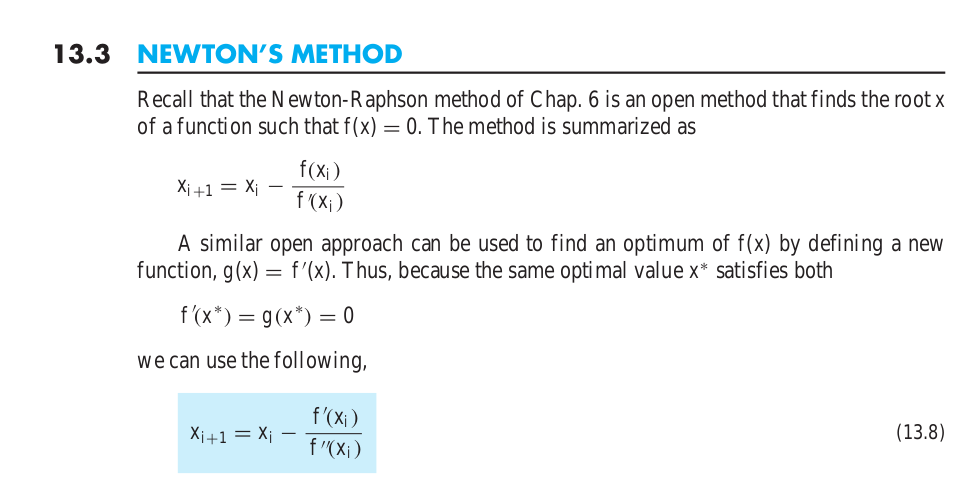

In [ ]:
##Ejemplo 13.3 Chapra y Canale pag.361 ed.6

f_x = lambda x:2*np.sin(x)-((x**2)/10)

df_x = lambda x:2*np.cos(x) - (x/5)
d2f_x = lambda x:-2*np.sin(x) -(1/5)

x0 = 2.5

#primera iteracion
x1 = x0 -df_x(x0)/d2f_x(x0)
print("Iter1  x1: ",x1, " f(x1): ",f_x(x1))

#segunda iteracion
x2 = x1 -df_x(x1)/d2f_x(x1)
print("Iter2  x2: ",x2, " f(x2): ",f_x(x2))

#tercera iteracion
x3 = x2 -df_x(x2)/d2f_x(x2)
print("Iter3  x3: ",x3, " f(x3): ",f_x(x3))

Iter1  x1:  0.9950815513259932  f(x1):  1.578588007246878
Iter2  x2:  1.4690107527596457  f(x2):  1.7738493793142234
Iter3  x3:  1.4276423210187772  f(x3):  1.7757256442136526


# Metodo de la Derivada

Se basa en obtener un nuevo valor a partir de anterior menos una fraccion de la derivada en ese punto. Simula el comportamiento de una bola en una bajada y tambien se denomina metodo del Gradiente en varias variables.

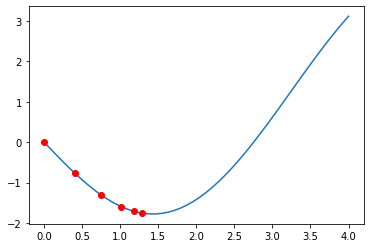

In [ ]:
from scipy import optimize as OP

f1_x = lambda x: -2*np.sin(x)+((x**2)/10)

df1_x = lambda x: -2*np.cos(x) + (x/5)
xr = np.linspace(0,4)
fxr = f1_x(xr)

plt.plot(xr,fxr)

#algoritmo
x0 = 0
f0 = f1_x(x0)
plt.plot(x0,f0,"ro")

alfa = 0.2
for k in range(5):
  x0 = x0 - alfa*df1_x(x0)
  f0 = f1_x(x0)
  plt.plot(x0,f0,"ro")


# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)




[Module scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

[Raices (roots)](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)($f(x) = 0$)

[Biseccion](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect)

[Newton](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)


[Punto Fijo (fixed point)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)($f_{fixed}(x) = x$)
